___
# EXERCICE FINAL
___

## 1 – Introduction

Cet exercice a pour objectif de vous amener à traiter des données issues d’une expérience en Sciences Cognitives à l’aide d’un script Python. 

Cette expérience cherche à voir s’il existe un biais lié au genre dans notre perception du corps humain. Pour résumer, nous allons chercher à voir si les femmes ont tendance à juger les corps féminins plus gros que les corps masculins, et nous faisons également l’hypothèse que cette tendance serait uniquement féminine. 

L’idée qui sous-tend ces hypothèses serait que les femmes sont exposées, à travers notamment les medias, à des « role models » très minces et à ce qui est coutume d’appeler la « dictature de la minceur ». Cette pression serait plus forte sur les femmes que sur les hommes. En clair, nous allons voir s’il existe un biais de perception lié au genre qui amènerait plus les femmes à percevoir Beyoncé « grosse » …

## 2 - Psychophysique très rapide

La question de la relation entre stimulus externe et perception est éminemment subjective, et de nature probabiliste. 

Ainsi, lorsqu’il s’agit de répondre à la question « avez-vous perçu un flash ? », à intensité lumineuse égale, deux personnes peuvent ne pas répondre de la même manière : l’une peut détecter le flash, l’autre non, et cette différence de réponse ne sera pas la même selon les intensités du flash. Idem, une même personne peut, pour deux flashes identiques, percevoir dans un cas et pas dans un autre. Toute cette relation entre stimulus et perception est le domaine de la psychophysique. 

Si nous étions des « détecteurs parfaits », nous aurions une réponse perceptive constante dès lors que l’intensité d’un stimulus dépasse ce que l’on appelle le « seuil perceptif ». 

![alt text](img/PES_figure.bmp)

Le Point d’Equivalence Subjectif est le niveau d’intensité du stimulus qui déclenche 50% de détection de la part du sujet.

![alt text](img/PES_figure2.bmp)

Cet exercice a pour but de déterminer les PES chez les participants, homme et femme, lorsqu’ils jugent des silhouettes masculines et féminines, et de les comparer.

On attend les résultats suivants (hypothèses non argumentées :-)

+ Les PES des femmes sont plus bas que ceux des hommes (effet du facteur « genre du participant »)
+ Les silhouettes féminines engendrent un PES plus bas que les silhouettes masculines (effet du facteur « type de silhouette »)
+ L’écart silhouettes féminines / masculines est plus important chez les femmes que chez les hommes (interaction entre facteur « genre du participant » et « type de silhouette »)


# Traitement des données

L'analyse va se dérouler en 5 étapes.

Il est évident que l'on va mettre en pratique, la totalité des outils de la semaine.

Voici un guide pour les étapes.

Les datas se trouve dans le zip **Data_exo_final.zip** sur github.

# Etape 1: moissonage des données

Conseils:
  * Inspecter bien le zip et ses fichiers.
  * Construire un grand DataFrame avec la totalité des données brutes. Nom du tableau = **data**

Contraintes:
  * On enlève toutes le réponses dont le TR (temps de réponses) est supérieur à 3s.

Guide pour les noms de variables et colonnes:
  * On garde les noms existant dans les csv
  * Il va falloir ajouter/calcluer les colonnes suivantes:
    * Subject
    * SubjectGender
    * ItemGender
    * ItemSize

Pour les bons:
  * reformater les nom des sujets avec 2 chiffres.

# Etape 2: calcul des réponses par sujet pour chaque silhouette

Conseils:
  * Construire un DataFrame intermédiaire qui contabilise le nombre de gros/mince pour chaque sujet et silouette.
    Puis la proportion nb_gros/nb_total pour chaque.
    Nom du tableau = **evaluations**






# Etape3 : Graphe des données individuelles

Balladez vous chez seaborn gallery et affichez quelque chose de malins avec le DataFrame **evaluations**

Par example, pour chaque sujet et silhouette un truc de ce style:
![alt text](img/PES_figure3.bmp)

Contraintes:
  * en 4 lignes SVP.


# Etape 4: Fit de la courbe psychometrique (avec interpolation) et estimation du PES

Dans les grands lignes, il faudrait approximer ces données réelles par une courbe psychométrique qui décrit au mieux les observations réelles. Théoriquement il faudrait utilser un Modèle Linéaire Général (GLM) avec un regression binomial.
A méditer: https://fr.wikipedia.org/wiki/R%C3%A9gression_logistique

Mais pour gagner du temps, on va utilser une interpolation pour fitter la courbe psychometrique.

Le PES est le « x_model » qui correspond à un « y_model » de 0.5. (50% de réponses « mince »). Nous allons donc tâcher de déterminer ce x_model.
Dans un premier temps, essayez d’en faire une lecture sur le graphe p.
Ensuite, nous allons déterminer le x_model qui amène la réponse la plus proche possible de 0.5. Ce ne sera pas 0.5 précisément, mais, pour ne pas trop compliquer les choses, nous nous contenterons de cette approximation.

A faire:
  * utilisez la fonction argmin pour chercher le point y_model le plus proche de 0.5 : Y_model_proche_de_0.5
  * pour ca, vous aurez besoin de la valeur absolue de la différence à 0.5
  * le x_model qui correspond à cet y_model_proche_de_0.5 : C’est le PES !
    (vérifiez qu’il correspond bien à l’estimation graphique que vous en avez faite)

Contrainte:
  * Mettre toutes les **pes** dans un DataFrame **all_pes **
  * Bien organiser ce tableau.
 

# Etape 5 : analyse de groupe

A partir du tableau **all_pes**:

  * Faire la moyenne des PES en fonction du genre des participants. Représenter graphiquement ce résultat.
  * Faire la moyenne des PES en fonction du type de silhouette. Représenter graphiquement ce résultat.
  * Faire la moyenne des PES en fonction du type de silhouette et du genre du participant. Représenter graphiquement ce résultat.
  * Faire un model a partir du dernier  résultats.




# Etape 1: lire les fichiers

  1. On extrait le zip là où il est. Soit à la main. Soit mieux sous python.
  2. On parcours l'arborescence avec glob
  3. On lit avec pandas.read_csv
  4. On empile dans une liste
  5. On concat le tout.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import zipfile
zipname = './data/Data_exo_final.zip'
f = zipfile.ZipFile(zipname)
f.extractall('.')

In [72]:
from pathlib import Path
data_path = Path('./Data_exo_final/')

data = []
for file_path in data_path.glob('**/*.csv'):
    # print(file_path)
    txt = file_path.parents[0].stem.replace('Sujet ', '')
    
    num_subject, subject_gender = txt.split('-')
    num_subject = int(num_subject)
    num_subject = f'{num_subject:02d}'
    
    df = pd.read_csv(file_path, sep=';')
    df['Subject'] = txt
    df['SubjectNum'] = num_subject
    df['SubjectGender'] = subject_gender

    data.append(df)

data_raw = pd.concat(data, axis=0)
data_raw



,Numero,Item,Evaluation,RT,Subject,SubjectNum,SubjectGender
0,1,W7,gros,3.734,1-F,01,F
1,2,W2,mince,2.064,1-F,01,F
2,3,M1,mince,2.454,1-F,01,F
3,4,W8,gros,1.878,1-F,01,F
4,5,W4,mince,1.798,1-F,01,F
...,...,...,...,...,...,...,...
13,14,W6,gros,1.844,9-H,09,H
14,15,W4,mince,1.031,9-H,09,H
15,16,M2,mince,1.156,9-H,09,H
16,17,M4,mince,1.093,9-H,09,H


In [73]:
def create_ItemGender(text):
    return text[0]

def create_ItemSize(text):
    return float(text[1])

data_raw.loc[:,'ItemGender'] = data_raw['Item'].apply(create_ItemGender)
data_raw.loc[:, 'ItemSize'] = data_raw['Item'].apply(create_ItemSize)
data_raw

,Numero,Item,Evaluation,RT,Subject,SubjectNum,SubjectGender,ItemGender,ItemSize
0,1,W7,gros,3.734,1-F,01,F,W,7.0
1,2,W2,mince,2.064,1-F,01,F,W,2.0
2,3,M1,mince,2.454,1-F,01,F,M,1.0
3,4,W8,gros,1.878,1-F,01,F,W,8.0
4,5,W4,mince,1.798,1-F,01,F,W,4.0
...,...,...,...,...,...,...,...,...,...
13,14,W6,gros,1.844,9-H,09,H,W,6.0
14,15,W4,mince,1.031,9-H,09,H,W,4.0
15,16,M2,mince,1.156,9-H,09,H,M,2.0
16,17,M4,mince,1.093,9-H,09,H,M,4.0


In [74]:
data = data_raw[data_raw['RT']<3.]
data = data.reset_index()
data.index

RangeIndex(start=0, stop=1775, step=1)

# Etape 2: calcul des reponses par Sujet/Item

In [75]:
evaluations = data.groupby(['Subject', 'Item', 'Evaluation'])['Subject'].count()
evaluations = evaluations.unstack('Evaluation')
evaluations


Evaluation    gros  mince
Subject Item             
1-F     M1     NaN    8.0
        M2     NaN    9.0
        M3     NaN    9.0
        M4     1.0    7.0
        M5    10.0    NaN
...            ...    ...
9-H     W5     NaN   10.0
        W6     8.0    2.0
        W7    10.0    NaN
        W8    10.0    NaN
        W9    10.0    NaN

[180 rows x 2 columns]

In [76]:
evaluations[evaluations.isnull()] = 0
evaluations.head()

Evaluation    gros  mince
Subject Item             
1-F     M1     0.0    8.0
        M2     0.0    9.0
        M3     0.0    9.0
        M4     1.0    7.0
        M5    10.0    0.0

In [77]:
evaluations['prop'] = evaluations['gros']/(evaluations['mince']+evaluations['gros'])
evaluations.head(20)

Evaluation    gros  mince      prop
Subject Item                       
1-F     M1     0.0    8.0  0.000000
        M2     0.0    9.0  0.000000
        M3     0.0    9.0  0.000000
        M4     1.0    7.0  0.125000
        M5    10.0    0.0  1.000000
        M6    10.0    0.0  1.000000
        M7    10.0    0.0  1.000000
        M8     9.0    0.0  1.000000
        M9    10.0    0.0  1.000000
        W1     0.0    7.0  0.000000
        W2     0.0   10.0  0.000000
        W3     0.0   10.0  0.000000
        W4     1.0    8.0  0.111111
        W5     8.0    0.0  1.000000
        W6    10.0    0.0  1.000000
        W7     8.0    0.0  1.000000
        W8    10.0    0.0  1.000000
        W9    10.0    0.0  1.000000
10-H    M1     0.0   10.0  0.000000
        M2     0.0   10.0  0.000000

In [78]:
evaluations = evaluations.reset_index()
evaluations

Evaluation,Subject,Item,gros,mince,prop
0,1-F,M1,0.0,8.0,0.000
1,1-F,M2,0.0,9.0,0.000
2,1-F,M3,0.0,9.0,0.000
3,1-F,M4,1.0,7.0,0.125
4,1-F,M5,10.0,0.0,1.000
...,...,...,...,...,...
175,9-H,W5,0.0,10.0,0.000
176,9-H,W6,8.0,2.0,0.800
177,9-H,W7,10.0,0.0,1.000
178,9-H,W8,10.0,0.0,1.000


In [79]:
evaluations.loc[:, 'ItemGender'] = evaluations['Item'].apply(create_ItemGender)
evaluations.loc[:, 'ItemSize'] = evaluations['Item'].apply(create_ItemSize)
evaluations

Evaluation,Subject,Item,gros,mince,prop,ItemGender,ItemSize
0,1-F,M1,0.0,8.0,0.000,M,1.0
1,1-F,M2,0.0,9.0,0.000,M,2.0
2,1-F,M3,0.0,9.0,0.000,M,3.0
3,1-F,M4,1.0,7.0,0.125,M,4.0
4,1-F,M5,10.0,0.0,1.000,M,5.0
...,...,...,...,...,...,...,...
175,9-H,W5,0.0,10.0,0.000,W,5.0
176,9-H,W6,8.0,2.0,0.800,W,6.0
177,9-H,W7,10.0,0.0,1.000,W,7.0
178,9-H,W8,10.0,0.0,1.000,W,8.0


# Etape 3: Affichage avec seaborn ou matplotlib

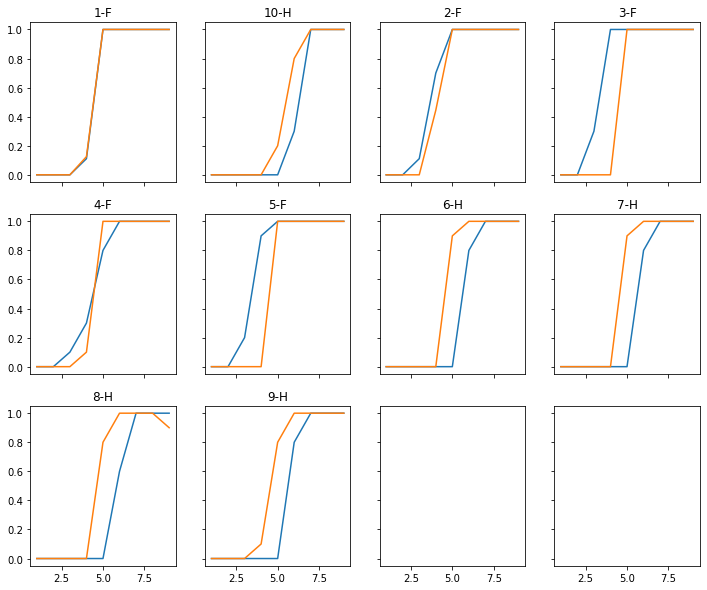

In [80]:
subjects = evaluations['Subject'].unique()
subjects
fig, axs = plt.subplots(ncols=4, nrows=3, sharex=True, sharey=True, figsize=(12, 10))
for s, subject in enumerate(subjects):
    ax = axs.flatten()[s]
    ax.set_title(subject)
    for item_gender in ['W', 'M']:
        ev = evaluations[(evaluations['Subject']==subject) & (evaluations['ItemGender']==item_gender)]
        ev = ev.sort_values('ItemSize')
        ax.plot(ev['ItemSize'], ev['prop'])


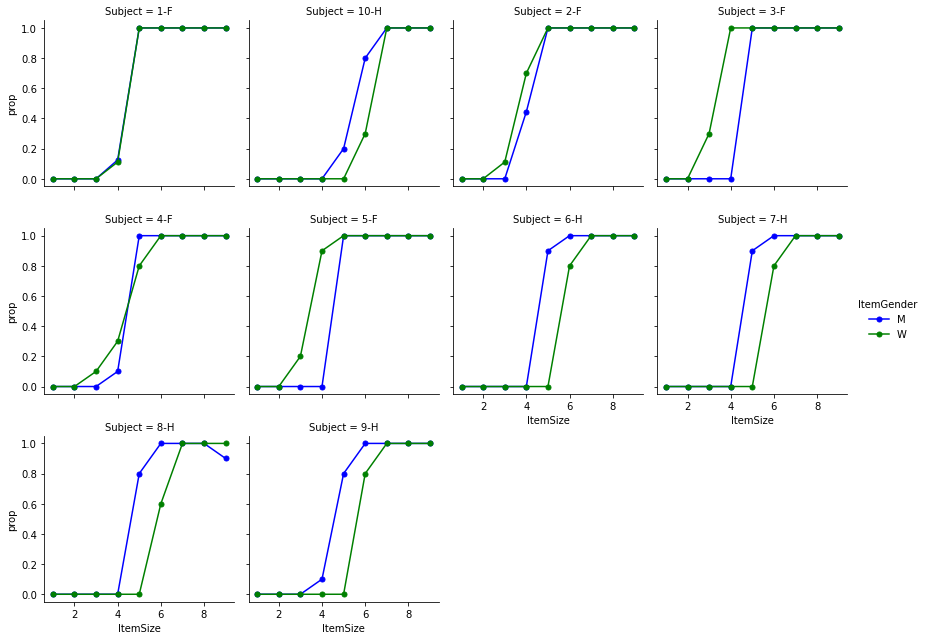

In [81]:
colors_item_gender = {'M':'blue', 'W':'green'}
grid = sns.FacetGrid(data=evaluations, col="Subject",
                hue="ItemGender", col_wrap=4, palette=colors_item_gender)
grid.map(plt.plot, "ItemSize", "prop", marker="o", ms=5)
grid.add_legend()

# Etape 4: fit des data pour trouver le PES

In [82]:
import scipy.interpolate

subjects = data['Subject'].unique()
subjects.sort()
item_genders = data['ItemGender'].unique()
item_genders.sort()
print(subjects)
print(item_genders)

all_fit = {}
for subject in subjects:
    for item_gender in item_genders:
        tab1 = evaluations[(evaluations['Subject']==subject) & (evaluations['ItemGender']==item_gender)]
        tab1 = tab1.sort_values(by='ItemSize')
        # print(tab1)
        #print(tab1[['ItemSize', 'prop']])
        fit_func = scipy.interpolate.interp1d(tab1['ItemSize'], tab1['prop'], kind='cubic')
        all_fit[(subject, item_gender)] = fit_func

['1-F' '10-H' '2-F' '3-F' '4-F' '5-F' '6-H' '7-H' '8-H' '9-H']
['M' 'W']


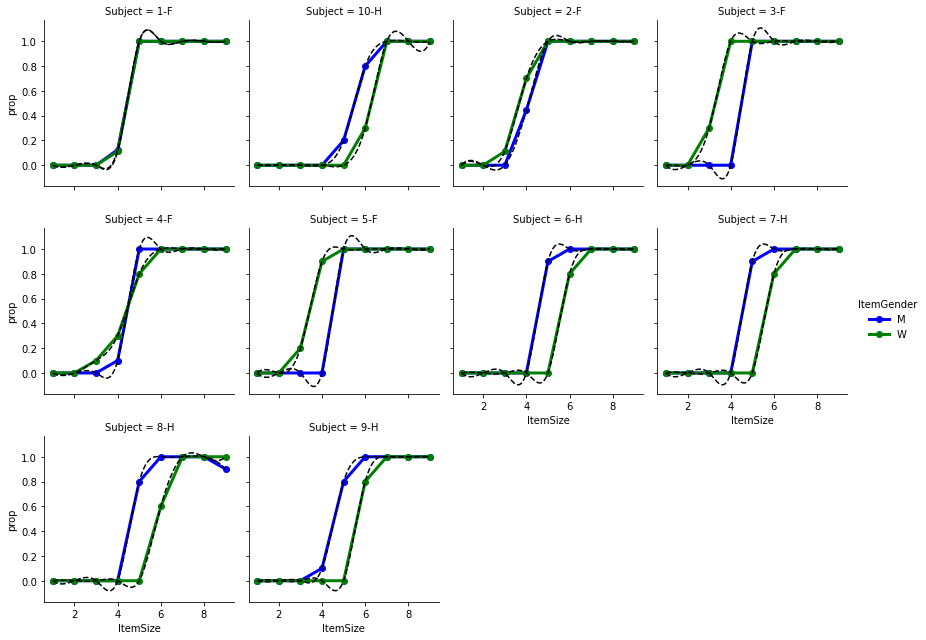

In [83]:
# On affiche dans le meme graph que précédement
grid = sns.FacetGrid(evaluations, col="Subject", hue="ItemGender", col_wrap=4, palette=colors_item_gender)
grid.map(plt.plot, "ItemSize", "prop", marker="o", ms=6, lw=3)
grid.add_legend()

x = np.arange(1,9,0.01)
for i, subject in enumerate(subjects):
    ax = grid.axes.flatten()[i]
    for item_gender in item_genders:
        fit_func = all_fit[(subject, item_gender)]
        y = fit_func(x)
        ax.plot(x, y, ls='--', color='k')

In [84]:
# on trouve la PES pour chaque subjet/ItemGender
# valeur de Item size quand prop est proche de 0.5

index = pd.MultiIndex.from_product([subjects, item_genders], names=['Subject', 'ItemGender'])
all_pes = pd.DataFrame(index=index, columns=['pes'], dtype='float64')


x = np.arange(1,9,0.01)
for subject in subjects:
    for item_gender in item_genders:
        fit_func = all_fit[(subject, item_gender)]
        y = fit_func(x)
        ind = np.argmin(np.abs(y-.5))
        all_pes.loc[(subject, item_gender), 'pes'] = x[ind]

#all_pes = all_pes.unstack('ItemGender')
all_pes


pes
Subject ItemGender      
1-F     M           4.43
        W           4.44
10-H    M           5.50
        W           6.28
2-F     M           4.09
        W           3.67
3-F     M           4.50
        W           3.27
4-F     M           4.44
        W           4.41
5-F     M           4.50
        W           3.42
6-H     M           4.56
        W           5.63
7-H     M           4.56
        W           5.63
8-H     M           4.63
        W           5.85
9-H     M           4.58
        W           5.63

# Etape5

In [85]:
# Petite ruse pour récupérer le genre sans soucis
all_pes = all_pes.reset_index()
all_pes['SubjectGender'] = all_pes['Subject'].apply(lambda s: s[-1])
all_pes

,Subject,ItemGender,pes,SubjectGender
0,1-F,M,4.43,F
1,1-F,W,4.44,F
2,10-H,M,5.50,H
3,10-H,W,6.28,H
4,2-F,M,4.09,F
5,2-F,W,3.67,F
6,3-F,M,4.50,F
7,3-F,W,3.27,F
8,4-F,M,4.44,F
9,4-F,W,4.41,F


SubjectGender
F    4.117
H    5.285
Name: pes, dtype: float64


C:\Users\samuel\anaconda3\envs\formation\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


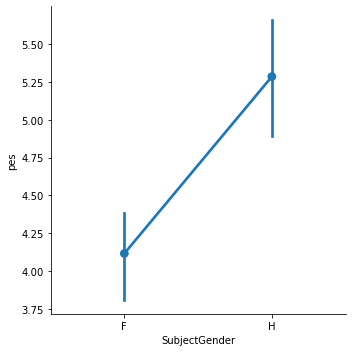

In [87]:
# par SubjectGender
m1 = all_pes.groupby(['SubjectGender'])['pes'].mean()
print(m1)
sns.factorplot(data=all_pes, x='SubjectGender', 
               pallette=colors_item_gender, y='pes')

ItemGender
M    4.579
W    4.823
Name: pes, dtype: float64


C:\Users\samuel\anaconda3\envs\formation\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


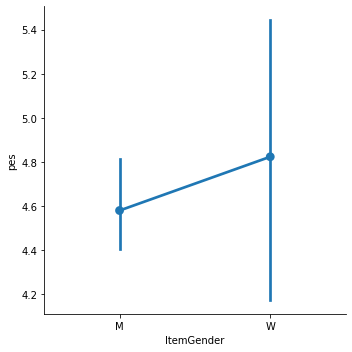

In [88]:
# par ItemGender
m2 = all_pes.groupby(['ItemGender'])['pes'].mean()
print(m2)
sns.factorplot(data=all_pes, x='ItemGender', 
               pallette=colors_item_gender, y='pes')

In [89]:
# Par SubjectGender/ItemGender
m3 = all_pes.groupby(['SubjectGender', 'ItemGender'])['pes'].mean()
m3 = m3.reset_index()
m3

,SubjectGender,ItemGender,pes
0,F,M,4.392
1,F,W,3.842
2,H,M,4.766
3,H,W,5.804


C:\Users\samuel\anaconda3\envs\formation\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


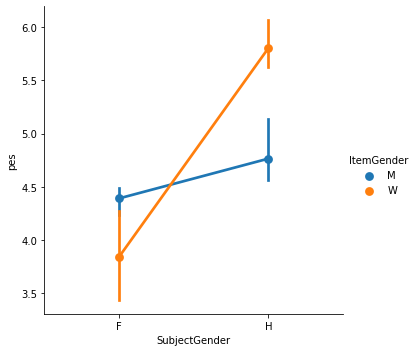

In [91]:
#Affichage 1
sns.factorplot(data=all_pes, x='SubjectGender', hue='ItemGender',
               pallette=colors_item_gender, y='pes')

<AxesSubplot:xlabel='ItemGender', ylabel='SubjectGender'>

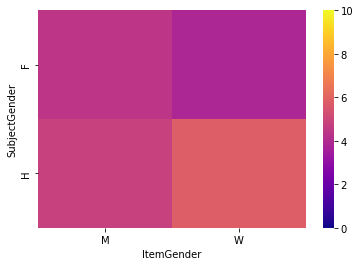

In [92]:
# Affichage 2
m3bis = m3.set_index(['SubjectGender', 'ItemGender']).unstack('ItemGender')
m3bis.columns = m3bis.columns.levels[1]
m3bis
sns.heatmap(m3bis, vmin=0., vmax=10.,cmap='plasma')

In [93]:
# Petite stat vite fait
# Attention c'est un model mixte car chaque sujet fait plusieurs mesures.
from statsmodels.formula.api import mixedlm

#on enleve les nan
all_pes = all_pes[all_pes['pes'].notnull()]

model = mixedlm('pes~ItemGender*SubjectGender', all_pes, groups='Subject') 
results = model.fit()
print(results.summary())

                    Mixed Linear Model Regression Results
Model:                    MixedLM         Dependent Variable:         pes    
No. Observations:         20              Method:                     REML   
No. Groups:               10              Scale:                      0.0904 
Min. group size:          2               Log-Likelihood:             -9.8856
Max. group size:          2               Converged:                  Yes    
Mean group size:          2.0                                                
-----------------------------------------------------------------------------
                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                           4.392    0.171 25.738 0.000  4.058  4.726
ItemGender[T.W]                    -0.550    0.190 -2.893 0.004 -0.923 -0.177
SubjectGender[T.H]                  0.374    0.241  1.550 0.121 -0.099  0.847
ItemGe